## Introdução

Este projeto investigará se existe uma forte correlação entre a produção econômica de um país e a expectativa de vida de seus cidadãos.

Os objetivos são preparar os dados, seguidos da análise com gráficos e buscar explicar os achados do estudo.

Aqui estão algumas perguntas que este projeto buscará responder:

+ A expectativa de vida aumentou ao longo do tempo nas seis nações?
+ O PIB aumentou ao longo do tempo nas seis nações?
+ Existe correlação entre o PIB e a expectativa de vida de um país?
+ Qual é a expectativa média de vida nessas nações?
+ Qual é a distribuição dessa expectativa de vida?

**Fontes de dados**

- Fonte do PIB: dados de contas nacionais do [Banco Mundial](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) e arquivos de dados de contas nacionais da OCDE.

- Expectativa de vida Fonte de dados: [Organização Mundial da Saúde](http://apps.who.int/gho/data/node.main.688)

## Importação das bibliotecas

In [40]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## Carregando os dados

In [41]:
df = pd.read_csv("all_data.csv")
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [42]:
df.shape

(96, 4)

## Explorando os dados

In [43]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


Foi possivel observar que será análisado os dados de 6 países.

In [44]:
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


A data dos dados análisados serão dos anos entre 2000 e 2015

## Limpando o nome das colunas

Foi possível perceber que o nome da primeira e da segunda coluna tem apenas uma palavra, já a terceira coluna contém 5 palavras. Nesse caso, seria bom renomea-la para a leitura ficar mais fácil na hora de mostrar os gráficos.

In [53]:
df = df.rename({"Life expectancy at birth (years)":"EDVA"}, axis = "columns")
df = df.rename({"Country":"País"}, axis = "columns")
df = df.rename({"Year":"Ano"}, axis = "columns")
df = df.rename({"GDP":"PIB"}, axis = "columns")

df.head()

,Pais,Ano,EDVA,PIB
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## Gráficos exploratórios

A exploração de dados por meio de gráficos às vezes pode ser muito mais eficaz, abaixo da distribuição do PIB que está sendo mostrada. A distribuição do PIB nos dados é muito enviesada para a direita, onde a maioria dos valores estão no lado esquerdo. Esse tipo de distribuição pode ser descrito como uma distribuição de lei de potência, que é uma distribuição comum o suficiente para ter seu próprio nome.

Text(0.5, 9.444444444444438, 'PIB em Trilhões de Dólares')

<Figure size 800x600 with 0 Axes>

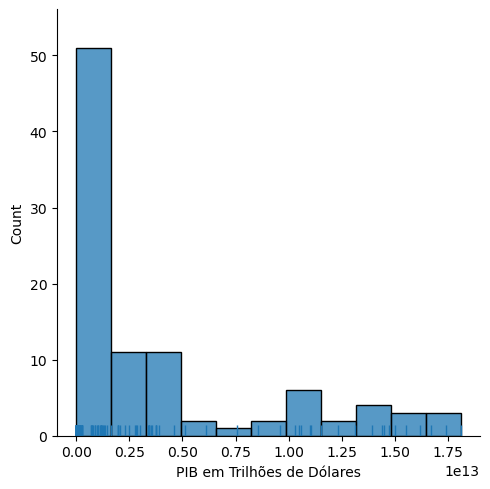

In [54]:
plt.figure(figsize = (8, 6))
sns.displot(df.PIB, rug = True, kde = False)
plt.xlabel("PIB em Trilhões de Dólares")

Em seguida, a distribuição de EDVA (Expectativa de Vida (Anos)) foi examinada. A distribuição de EDVA nos dados é muito assimétrica à esquerda, onde a maioria dos valores está no lado direito. Isso é quase o oposto do que foi observado na coluna do PIB. Uma análise mais aprofundada também pode identificar modos diferentes ou agrupamentos menores de distribuições dentro do intervalo.

Text(0.5, 9.444444444444438, 'Expectativa de Vida (Anos)')

<Figure size 800x600 with 0 Axes>

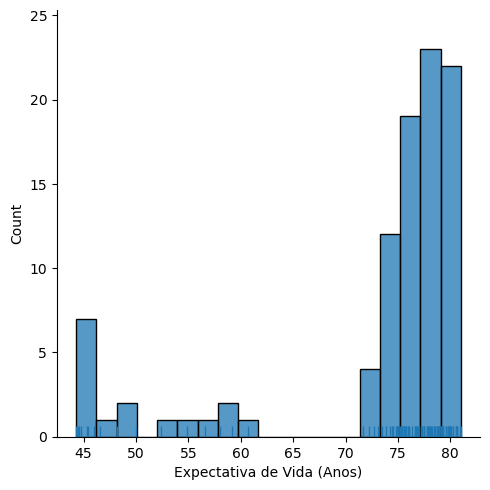

In [55]:
plt.figure(figsize= (8, 6))
sns.displot(df.EDVA, rug = True, kde = False)
plt.xlabel("Expectativa de Vida (Anos)")

Os gráficos anteriores não dividiam os dados por países, então a próxima tarefa será encontrar a expectativa de vida média e o PIB por país.

In [56]:
dfMeans = df.drop("Ano", axis = 1).groupby("Pais").mean().reset_index()

In [57]:
dfMeans

,Pais,EDVA,PIB
0,Chile,78.94375,1.697888e+11
1,China,74.26250,4.957714e+12
2,Germany,79.65625,3.094776e+12
3,Mexico,75.71875,9.766506e+11
4,United States of America,78.06250,1.407500e+13
5,Zimbabwe,50.09375,9.062580e+09


Agora que eles foram divididos por país e os valores médios para a expectativa de vida e PIB foram criados, os gráficos de barras mostrando os valores médios para cada variável serão criados abaixo.

O primeiro gráfico é a expectativa de vida e todos os países, exceto o Zimbábue, têm valores na casa dos 70 anos. Isso provavelmente explica a distorção na distribuição anterior!

Text(0.5, 0, 'Expectativa de Vida(Anos)')

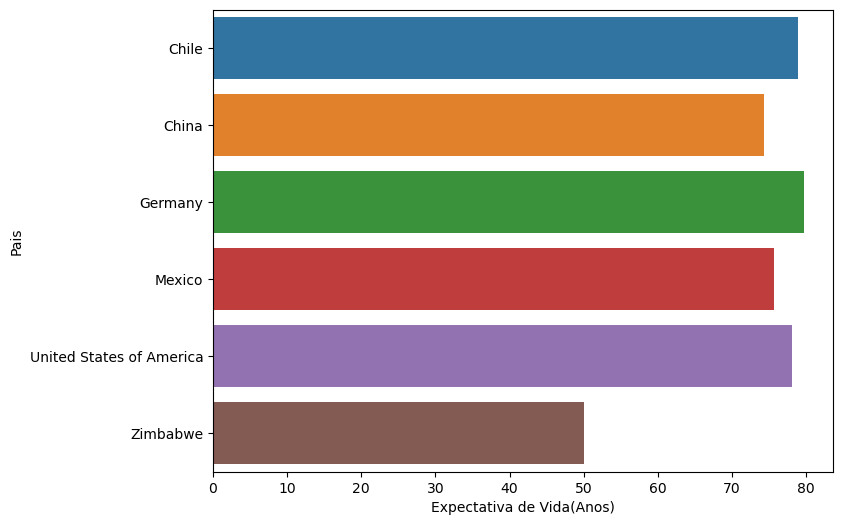

In [58]:
plt.figure(figsize=(8,6))
sns.barplot(x="EDVA", y="Pais", data=dfMeans)
plt.xlabel("Expectativa de Vida(Anos)")

Text(0.5, 0, 'PIB em Trilhões de Dólares')

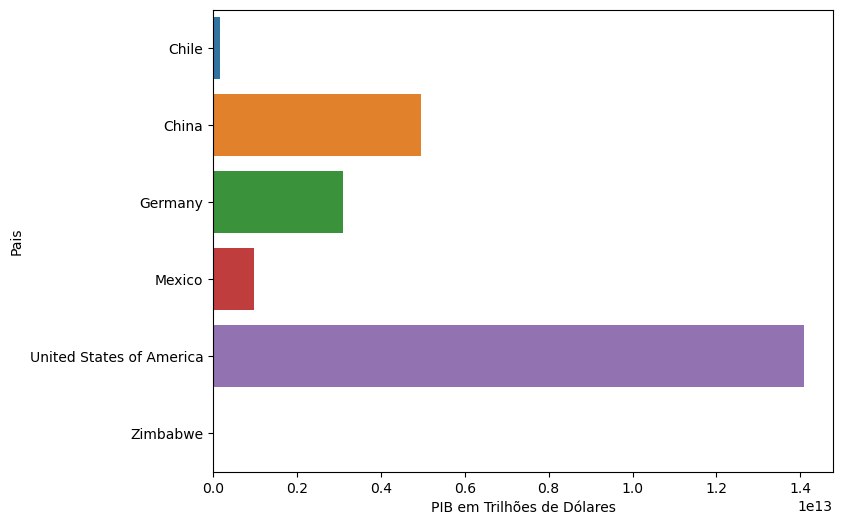

In [59]:
plt.figure(figsize = (8, 6))
sns.barplot(x = "PIB", y = "Pais", data = dfMeans)
plt.xlabel("PIB em Trilhões de Dólares")

Para o PIB médio por país parece que os EUA têm um valor muito superior em comparação com o resto dos países. Neste gráfico de barras, o Zimbábue nem mesmo é visível onde o Chile mal é visto. Em comparação, os EUA têm um PIB enorme em comparação com o resto. China, Alemanha e México parecem estar relativamente próximos em números.

## Gráficos Violino

Outra maneira de comparar dados é visualizar as distribuições de cada um e procurar padrões nas formas.

O gráfico de violino é uma escolha popular porque pode mostrar a forma da distribuição em comparação com o gráfico de caixa. Abaixo, o país está no eixo x e a distribuição das colunas numéricas: `PIB` e `EDVA` estão no eixo y.

No gráfico `PIB` à esquerda, a China e os EUA têm uma variação relativamente ampla, enquanto Zimbábue, Chile e México têm variações mais curtas.

No gráfico `EDVA`, muitos dos países têm faixas mais curtas, exceto o Zimbábue, que tem uma faixa que vai de 30 a 60 anos.

Text(0.5, 0, 'Expectativa de Vida (Anos)')

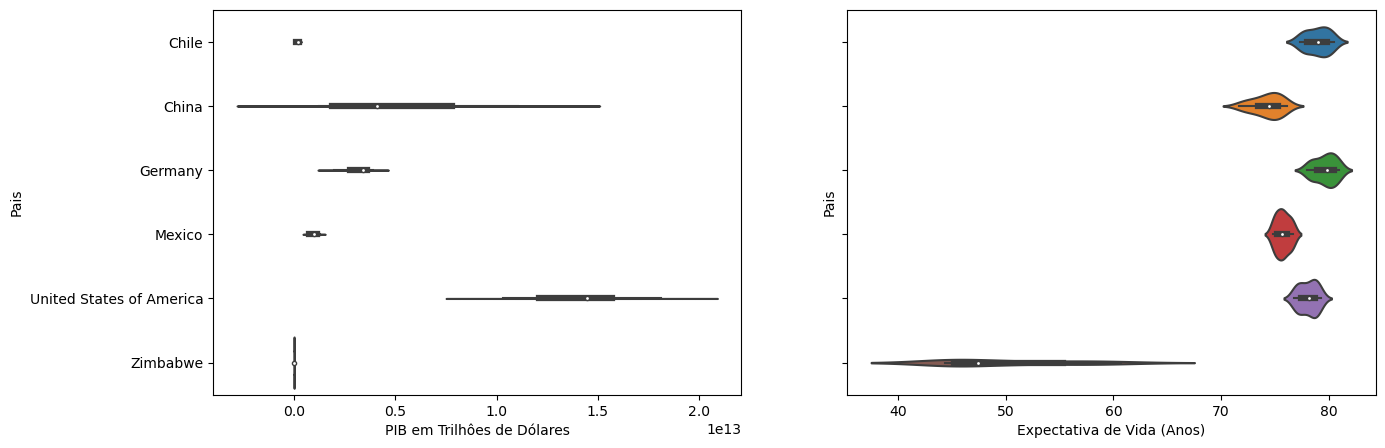

In [62]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0] = sns.violinplot(ax=axes[0], x=df.PIB, y=df.Pais)
axes[0].set_xlabel("PIB em Trilhôes de Dólares")
axes[1] = sns.violinplot(ax=axes[1], x=df.EDVA, y=df.Pais)
axes[1].set_xlabel("Expectativa de Vida (Anos)")

#### Gráficos de enxame / Strip Plot

Outro método mais recente para mostrar distribuições é o gráfico de enxame, e eles podem ser usados ​​para complementar os gráficos de caixa e violino. Primeiro, o gráfico de enxame autônomo é mostrado e, em seguida, sobreposto em cima de um gráfico de violino. Os gráficos de enxame são úteis porque mostram a densidade de pontos em torno dos valores, bem como a distribuição por área/forma.

No caso do gráfico `PIB` à esquerda, Chile e Zimbábue têm uma linha vertical de pontos que ilustram o número de pontos de dados que caem em torno de seus valores. Esse detalhe teria sido perdido no gráfico de caixa, a menos que o leitor seja muito hábil em visualizações de dados.

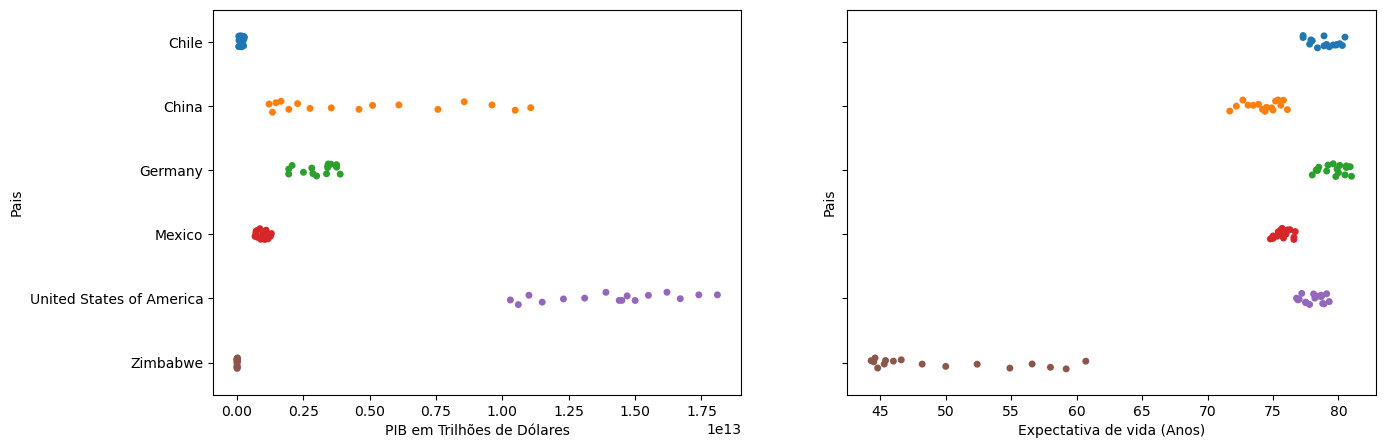

In [71]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0] = sns.stripplot(ax=axes[0], x=df.PIB, y=df.Pais)
axes[0].set_xlabel("PIB em Trilhões de Dólares")
axes[1] = sns.stripplot(ax=axes[1], x=df.EDVA, y=df.Pais)
axes[1].set_xlabel("Expectativa de vida (Anos)");

Text(0.5, 0, 'Expectativa de vida (Anos)')

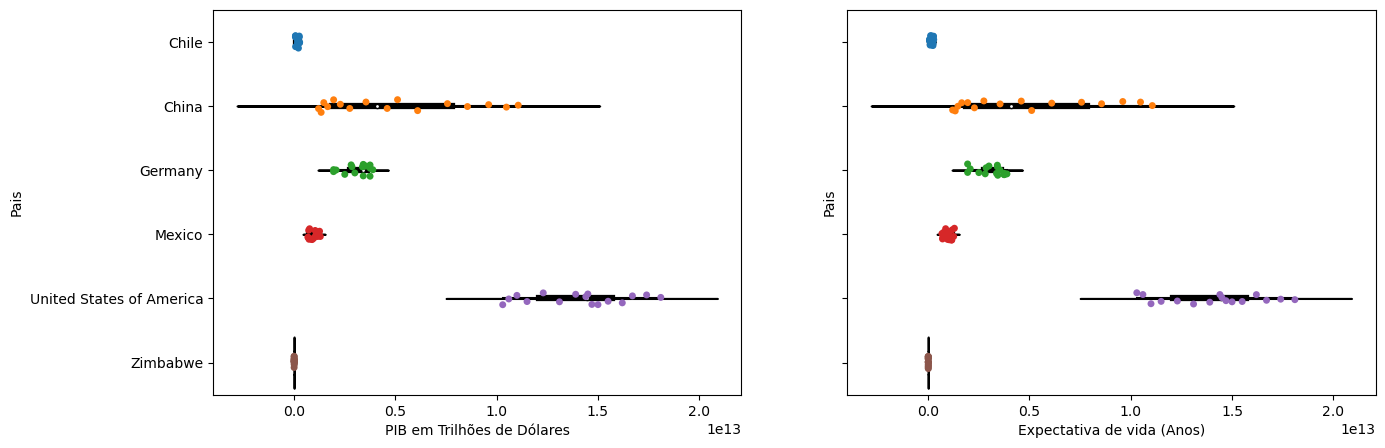

In [72]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
axes[0] = sns.violinplot(ax=axes[0], x=df.PIB, y=df.Pais,color = "black")
axes[0] = sns.stripplot(ax=axes[0], x=df.PIB, y=df.Pais)
axes[0].set_xlabel("PIB em Trilhões de Dólares")
axes[1] = sns.violinplot(ax=axes[1], x=df.PIB, y=df.Pais, color = "black")
axes[1] = sns.stripplot(ax=axes[1], x=df.PIB, y=df.Pais)
axes[1].set_xlabel("Expectativa de vida (Anos)")

#### Gráficos de linhas

Em seguida, os dados explorarão `PIB` e `EDVA` ao longo dos anos por meio de gráficos de linha. Abaixo os países estão separados por cores e pode-se ver que os EUA e a China tiveram ganhos substanciais entre 2000-2015. A China passou de menos de um quarto de trilhão de dólares para um trilhão de dólares no intervalo de tempo. Os demais países não tiveram aumentos dessa magnitude.

Text(0, 0.5, 'PIB em Trilhões de Dólares')

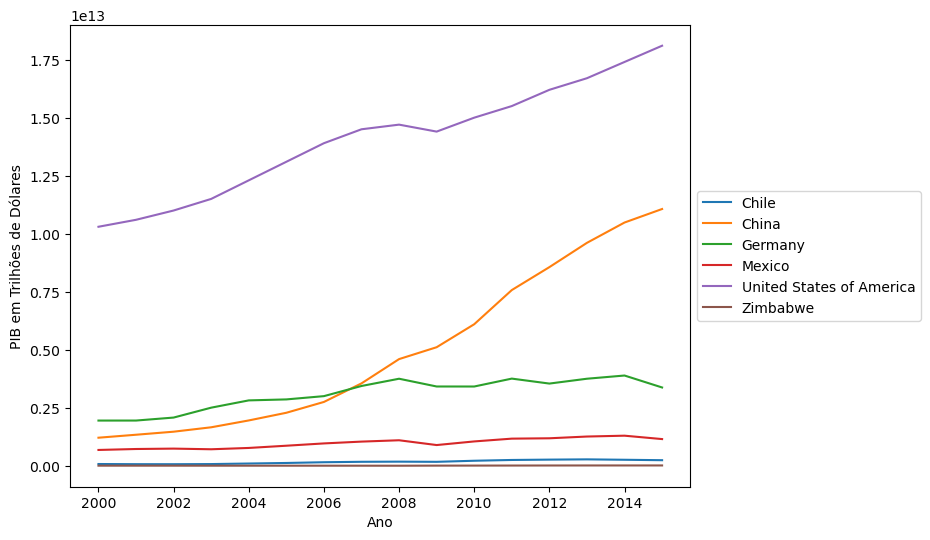

In [73]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Ano, y=df.PIB, hue=df.Pais)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("PIB em Trilhões de Dólares")

Outro aspecto aprofundado foram os gráficos de linhas facetadas por país. Nas parcelas individuais, cada país tem seu próprio eixo y, o que facilita a comparação da forma de seu `PIB` ao longo dos anos sem a mesma escala. Este método torna mais fácil ver que todos os países tiveram aumentos. No gráfico acima, o crescimento do PIB do outro país parecia modesto em comparação com a China e os EUA, mas todos os países tiveram crescimento desde o ano 2000.

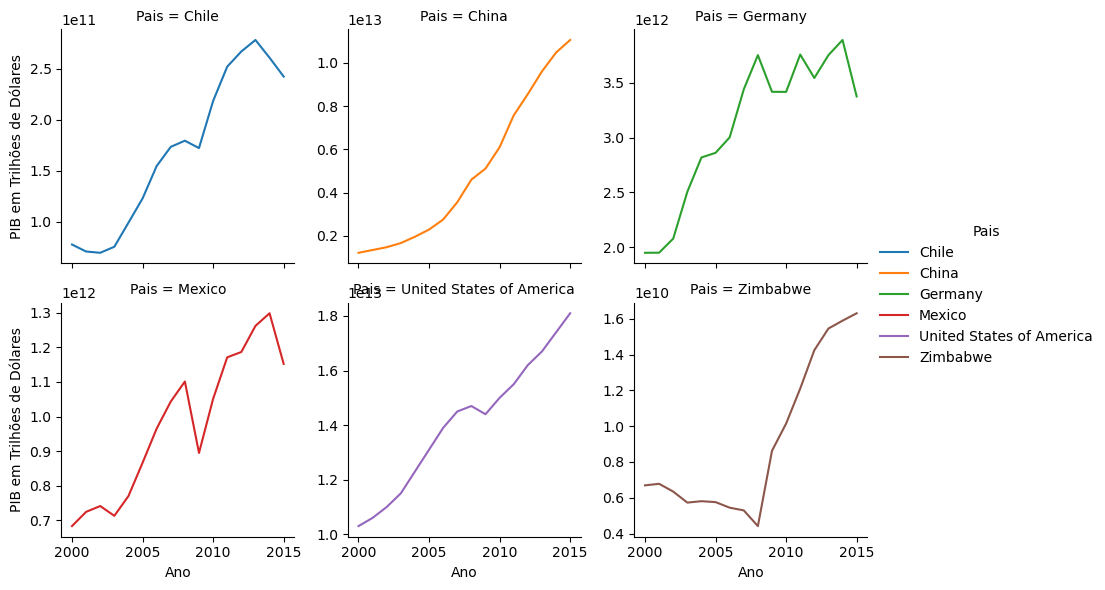

In [67]:
graphGDP = sns.FacetGrid(df, col="Pais", col_wrap=3,
                      hue = "Pais", sharey = False)

graphGDP = (graphGDP.map(sns.lineplot,"Ano","PIB")
         .add_legend()
         .set_axis_labels("Ano","PIB em Trilhões de Dólares"))

graphGDP;

O gráfico abaixo mostra agora a expectativa de vida ao longo dos anos. O gráfico mostra que todos os países têm aumentado sua expectativa de vida, mas o Zimbábue teve o maior aumento após uma pequena queda em 2004.

Text(0, 0.5, 'Expectativa de Vida (Anos)')

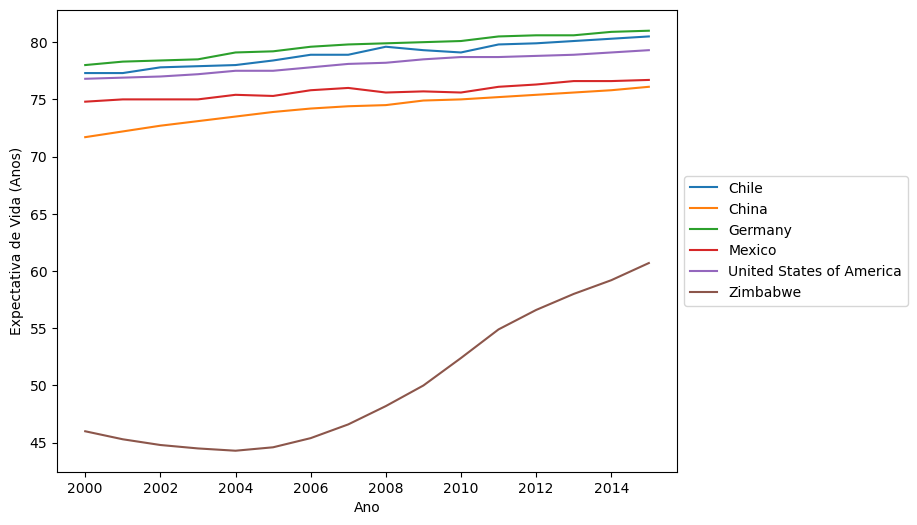

In [68]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Ano, y=df.EDVA, hue=df.Pais)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("Expectativa de Vida (Anos)")

Assim como a divisão do PIB por país antes, o gráfico abaixo mostra a expectativa de vida por país. É evidente que o Chile e o México pareciam ter quedas em sua expectativa de vida na mesma época, o que poderia ser analisado mais a fundo. Esse tipo de plotagem se mostra útil, pois muitas dessas nuances foram perdidas quando o eixo y foi compartilhado entre os países. Além disso, as mudanças aparentemente lineares, na realidade, não foram tão suaves para alguns dos países.

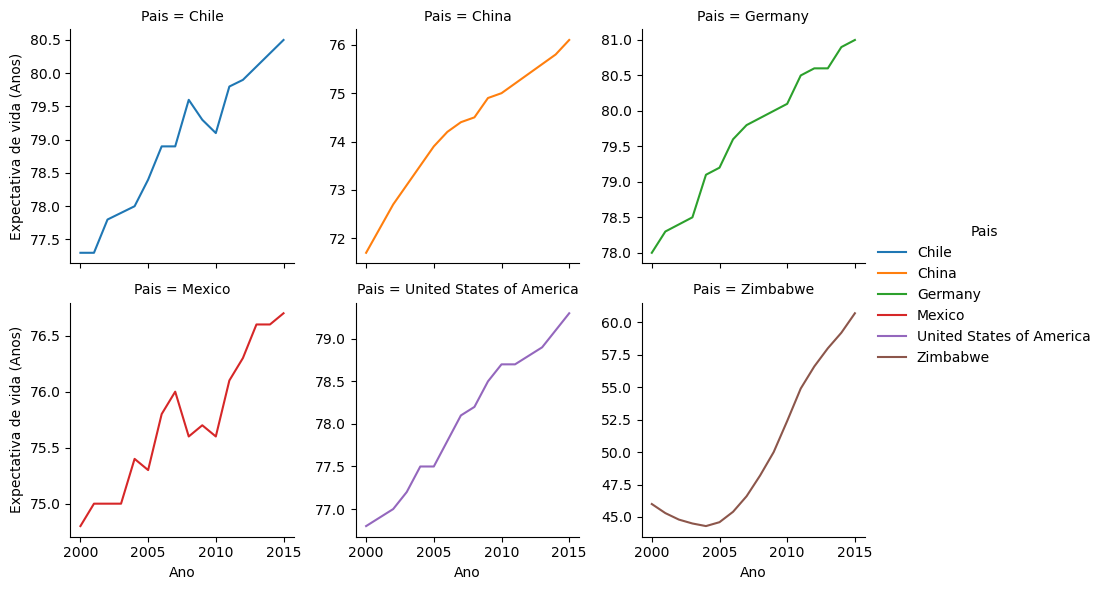

In [69]:
graphLEABY = sns.FacetGrid(df, col="Pais", col_wrap=3,
                      hue = "Pais", sharey = False)

graphLEABY = (graphLEABY.map(sns.lineplot,"Ano","EDVA")
         .add_legend()
         .set_axis_labels("Ano","Expectativa de vida (Anos)"))

graphLEABY

#### Gráfico de Dispersão

Os próximos dois gráficos explorarão a relação entre `PIB` e `EDVA`. No gráfico abaixo, parece com os gráficos anteriores em que o PIB do Zimbábue permanece estável, enquanto a expectativa de vida aumenta. Para os outros países, eles parecem exibir um aumento na expectativa de vida à medida que o PIB aumenta. Os EUA e a China parecem ter inclinações muito semelhantes em sua relação entre PIB e expectativa de vida

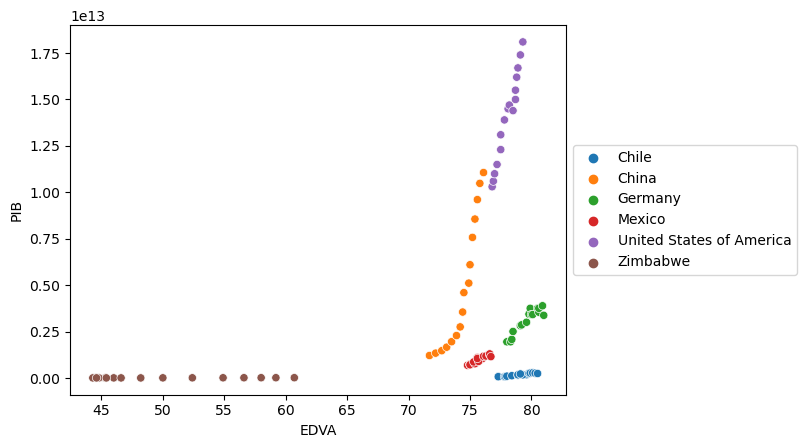

In [70]:
sns.scatterplot(x=df.EDVA, y=df.PIB, hue=df.Pais).legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1);

Como nos gráficos anteriores, os países são divididos em cada gráfico de dispersão por facetas. Olhando para os países individualmente, a maioria dos países como os EUA, México e Zimbábue têm relações lineares entre o PIB e a expectativa de vida. A China, por outro lado, tem uma curva ligeiramente exponencial, e a do Chile parece um pouco logarítmica. Em geral, porém, pode-se observar um aumento do PIB e da expectativa de vida, exibindo uma correlação positiva.

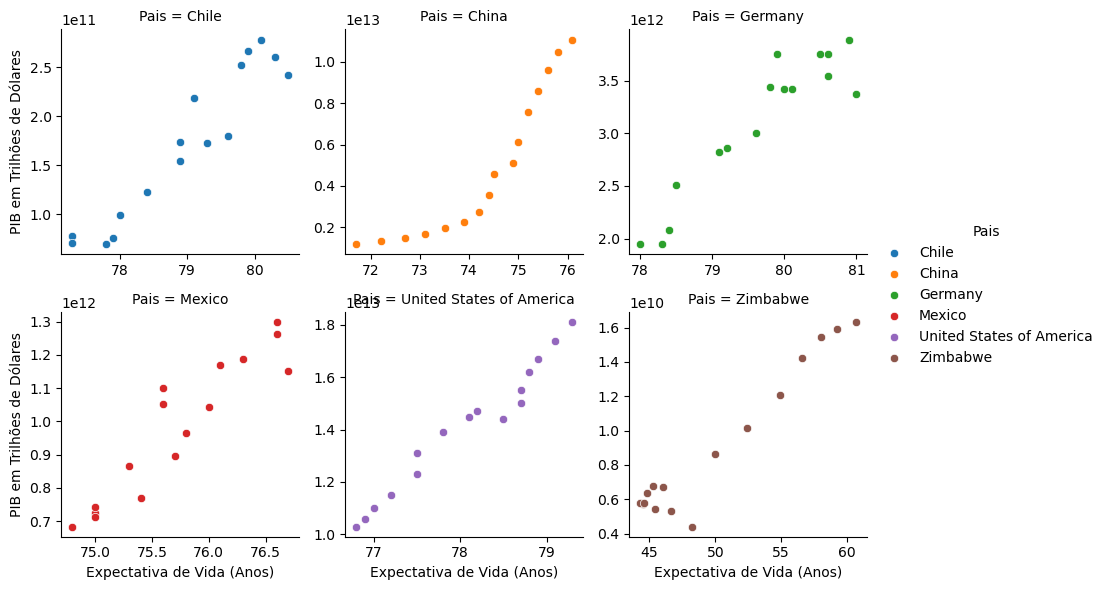

In [74]:
graph = sns.FacetGrid(df, col="Pais", col_wrap=3,
                      hue = "Pais", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"EDVA", "PIB")
         .add_legend()
         .set_axis_labels("Expectativa de Vida (Anos)", "PIB em Trilhões de Dólares"));


## Conclusões

Este projeto foi capaz de fazer algumas visualizações de dados com os dados, embora houvesse apenas 96 linhas e 4 colunas.

O projeto também foi capaz de responder às questões colocadas no início:

- A expectativa de vida aumentou ao longo do tempo nas seis nações?
    - Sim, com o Zimbábue tendo o maior aumento.
- O PIB aumentou ao longo do tempo nas seis nações?
    - O PIB também aumentou para todos os países da nossa lista, especialmente para a China.
- Existe correlação entre o PIB e a expectativa de vida de um país?
    - Sim, existe uma correlação positiva entre o PIB e a expectativa de vida dos países da nossa lista.
- Qual é a expectativa média de vida nessas nações?
    - A expectativa média de vida situava-se entre os 70 anos para os países, exceto para o Zimbabwe, que era de 50 anos.
- Qual é a distribuição dessa expectativa de vida?
    - A expectativa de vida tinha uma inclinação para a esquerda, ou a maioria das observações estava no lado direito.